In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# load model file and history of the model
saved_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/models/'

model = tf.keras.models.load_model(saved_dir + 'drowsiness_detection_model_2.h5')

with open(saved_dir + 'drowsiness_detection_model_2_history.pkl', 'rb') as file:
    history = pickle.load(file)

In [3]:
# load test splits
saved_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/train_test_val_splits_preprocessed_combined_dataset/'

X_test = np.load(saved_dir + 'X_test.npy')

y_test = np.load(saved_dir + 'y_test.npy')

In [4]:
training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']

# Calculate the number of training epochs:
# - `len(training_loss)` calculates the length of the training_loss list, which typically
#   contains the loss value at the end of each training epoch.
# - This length tells us how many epochs the machine learning model was trained for.

# Create a range of values representing epochs:
# - `range(1, len(training_loss) + 1)` generates a Python range object starting from 1 and
#   ending at the length of the training_loss list plus one.
# - The +1 is added to ensure that the range includes values up to the number of epochs.
# - This range is often used as the x-axis when plotting training metrics against the
#   number of training iterations (epochs).
epochs = range(1, len(training_loss) + 1)

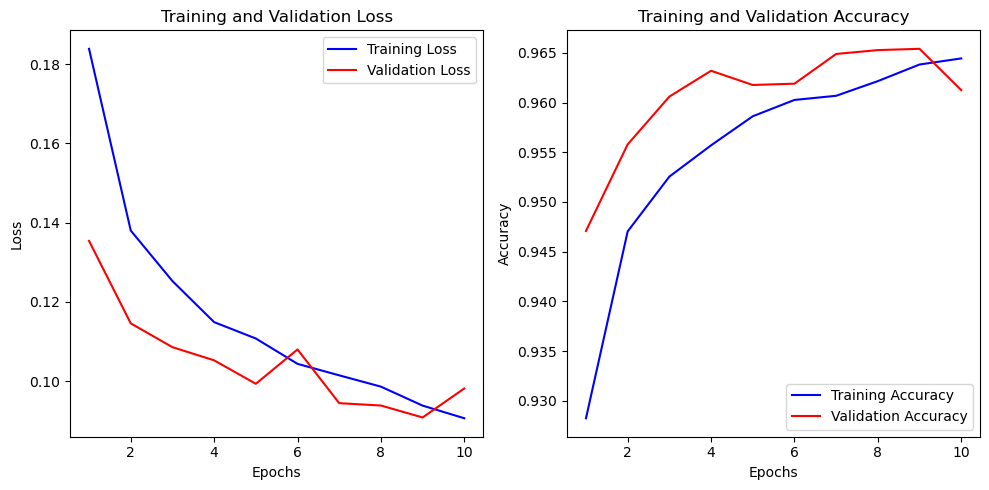

In [5]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
model.evaluate(X_test, y_test)

241/241 [==============================] - 198s 809ms/step - loss: 0.0951 - accuracy: 0.9635


[0.09512303024530411, 0.9634732604026794]

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [8]:
# Make predictions using trained model on the test dataset
y_pred = model.predict(X_test)

241/241 [==============================] - 195s 791ms/step


In [9]:
y_pred, y_test

(array([[7.3667005e-02],
        [4.3610603e-02],
        [5.9256918e-06],
        ...,
        [3.5537281e-03],
        [4.8839380e-03],
        [9.9910170e-01]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 1]))

In [10]:
# Convert y_pred probabilities to binary predictions (0 or 1), threshold = 0.5
y_pred_binary = np.round(y_pred)
y_pred_binary

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [11]:
# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

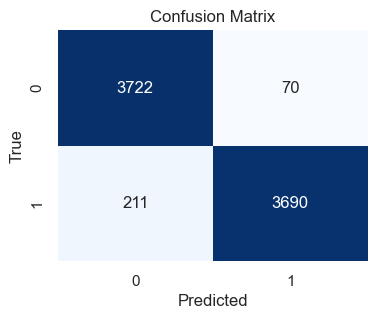

In [12]:
# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.0)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# create classification report
class_report = classification_report(y_test, y_pred_binary)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3792
           1       0.98      0.95      0.96      3901

    accuracy                           0.96      7693
   macro avg       0.96      0.96      0.96      7693
weighted avg       0.96      0.96      0.96      7693

